In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as ttp
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


data_true=pd.read_csv("/content/true_news.csv")
data_fake=pd.read_csv("/content/fake_news.csv")
data_true.head(5)
data_fake.head(5)

,s.no,title,text,label
0,1,Breaking: Giant alien spaceship spotted over N...,Reports are flooding in of a massive alien spa...,False
1,2,New cure for cancer discovered by teenage prodigy,A 16-year-old prodigy claims to have discovere...,False
2,3,Breaking: Loch Ness Monster spotted in London ...,Tourists and locals alike were shocked when th...,False
3,4,Breaking: Zombie outbreak reported in small town,Residents of a small town in the Midwest are r...,False
4,5,"Breaking: Alien invasion imminent, says govern...","In a shocking announcement, a government offic...",False


In [ ]:
data_true.shape, data_fake.shape

((25, 4), (25, 4))

In [ ]:
data_true["class"]=1
data_fake["class"]=0


In [ ]:
data_true_manual_testing = data_true.tail(10)
for i in range(24,14,-1):
  data_true.drop([i],axis=0, inplace=True)
data_fake_manual_testing = data_fake.tail(10)
for i in range(24,14,-1):
  data_fake.drop([i],axis=0, inplace=True)


data_manual_testing = pd.concat([data_fake_manual_testing,data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")


In [ ]:
data_merge = pd.concat([data_fake,data_true],axis=0)
print(data_merge)

In [1]:
print(data_merge.groupby(['class'])['text'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['class'])['text'].count().plot(kind="pie")
plt.title("Fake news and True News",size=20)
plt.show()


NameError: name 'data_merge' is not defined

In [ ]:
data = data_merge.drop(["title","label"], axis=1)
data.head(10)

,s.no,text,class
0,1,Reports are flooding in of a massive alien spa...,0
1,2,A 16-year-old prodigy claims to have discovere...,0
2,3,Tourists and locals alike were shocked when th...,0
3,4,Residents of a small town in the Midwest are r...,0
4,5,"In a shocking announcement, a government offic...",0
5,6,"A new diet pill called ""SlimFast"" claims to of...",0
6,7,A prominent conspiracy theorist has claimed th...,0
7,8,Park rangers are investigating reports of a Sa...,0
8,9,A massive sinkhole has opened up in the middle...,0
9,10,"A new smartphone app called ""BabyTalk"" claims ...",0


In [ ]:
x=data["text"]
y=data["class"]


In [ ]:
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)
#X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
#IDF returns numerical statics that how the word is important to the document
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)

In [ ]:
#Lgistic Regression:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xv_train,y_train) #training or fitting the model to the training set
accuracy = LR.score(xv_test,y_test).round(2) # method computes the accuracy␣
print("Accuracy is" , accuracy)
pred_LR= LR.predict(xv_test) # Predict using the linear model
print(classification_report(y_test,pred_LR))

Accuracy is 0.88
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



[[4 0]
 [1 3]]


<Axes: >

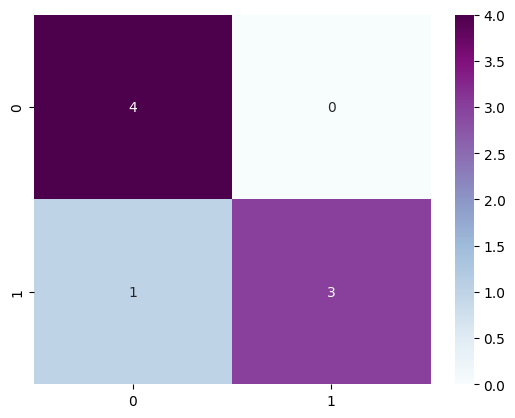

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,pred_LR)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="BuPu",annot=True)

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

ValueError: could not convert string to float: 'In a historic move, the president has signed a bill into law that will raise the minimum wage nationwide, providing much-needed relief to low-income workers.'

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the data and regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred_LiR)
#print("Mean Squared Error:", mse)

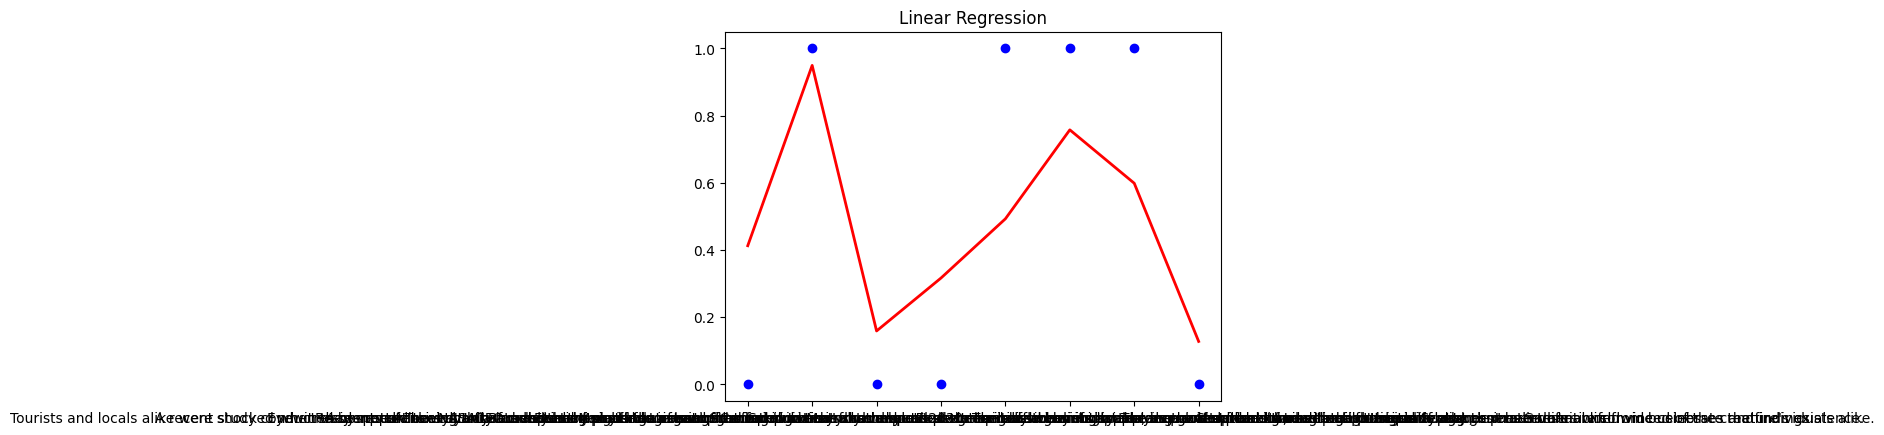

In [ ]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, pred_LiR, color='red', linewidth=2)

plt.title('Linear Regression')
plt.show()